## tentando treinar um modelo do tensorflow aqui, modelo para prever a função seno

Não vou copiar código de nenhum arquivo da internet, somente do livro  TinyML passarinho

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras import layers

# Gerando 1000 valores aleatorios de entrada da função seno de 0 a 2pi, inserindo ruído nos dados e separando o dataset

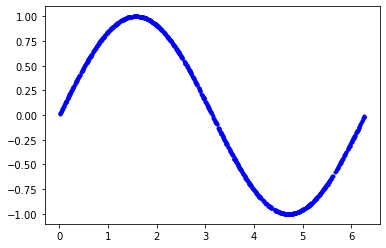

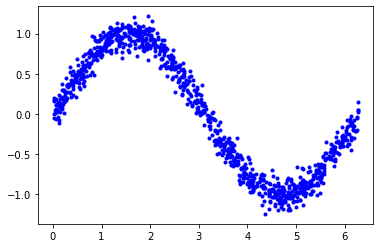

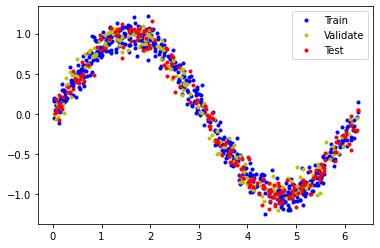

In [2]:
# gerando os dados
SAMPLES = 1000
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
y_values = np.sin(x_values)
plt.plot(x_values, y_values, 'b.') 
plt.show()

# inserindo ruido
y_values += 0.1 * np.random.randn(*y_values.shape)
plt.plot(x_values, y_values, 'b.')
plt.show()

# dividindo o dataset
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Checando se a divisão está na quantidade total correta
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

# Definindo modelo 1: modelo básico

In [3]:
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# Treinando o modelo 1

In [4]:
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=16,steps_per_epoch=None, validation_data=(x_validate, y_validate))

Epoch 1/500
38/38 [==============================] - 1s 5ms/step - loss: 0.5034 - mae: 0.6241 - val_loss: 0.4441 - val_mae: 0.5873
Epoch 2/500
38/38 [==============================] - 0s 2ms/step - loss: 0.3871 - mae: 0.5391 - val_loss: 0.3853 - val_mae: 0.5527
Epoch 3/500
38/38 [==============================] - 0s 2ms/step - loss: 0.3346 - mae: 0.5014 - val_loss: 0.3432 - val_mae: 0.5039
Epoch 4/500
38/38 [==============================] - 0s 2ms/step - loss: 0.2972 - mae: 0.4722 - val_loss: 0.2952 - val_mae: 0.4846
Epoch 5/500
38/38 [==============================] - 0s 2ms/step - loss: 0.2612 - mae: 0.4468 - val_loss: 0.2560 - val_mae: 0.4512
Epoch 6/500
38/38 [==============================] - 0s 2ms/step - loss: 0.2317 - mae: 0.4212 - val_loss: 0.2304 - val_mae: 0.4294
Epoch 7/500
38/38 [==============================] - 0s 2ms/step - loss: 0.2126 - mae: 0.4053 - val_loss: 0.2095 - val_mae: 0.4098
Epoch 8/500
38/38 [==============================] - 0s 2ms/step - loss: 0.1973 - m

# Analisando graficamente o histórico de treino e da métrica MAE (mean absolute error) do modelo 1

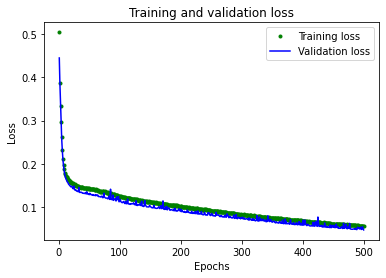

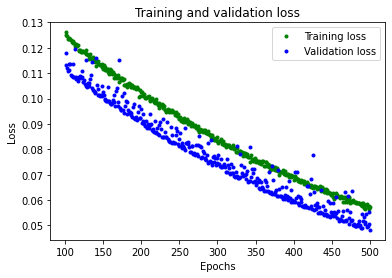

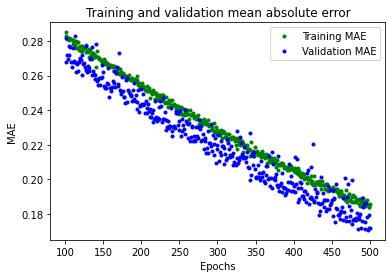

In [5]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Comparando a inferência do modelo 1 com os valores reais

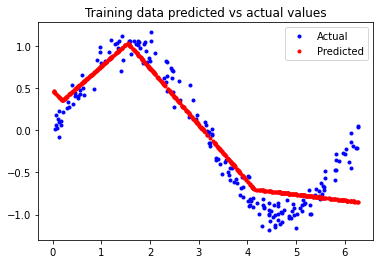

In [6]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

# Treinando o modelo 2 mais parrudo

In [7]:
model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


# Treinando o modelo 2

In [8]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 4ms/step - loss: 0.4004 - mae: 0.5476 - val_loss: 0.3771 - val_mae: 0.5341
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3219 - mae: 0.4907 - val_loss: 0.3092 - val_mae: 0.4876
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2662 - mae: 0.4487 - val_loss: 0.2551 - val_mae: 0.4524
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2259 - mae: 0.4167 - val_loss: 0.2124 - val_mae: 0.4113
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1960 - mae: 0.3890 - val_loss: 0.1831 - val_mae: 0.3814
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1773 - mae: 0.3689 - val_loss: 0.1665 - val_mae: 0.3574
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1680 - mae: 0.3558 - val_loss: 0.1567 - val_mae: 0.3455
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1610 - m

# Analisando graficamente o histórico de treino e a metrica MAE do modelo 2

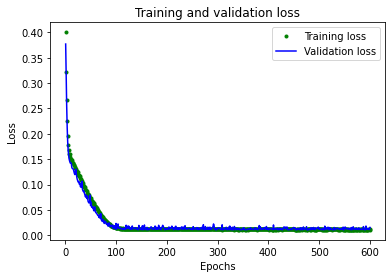

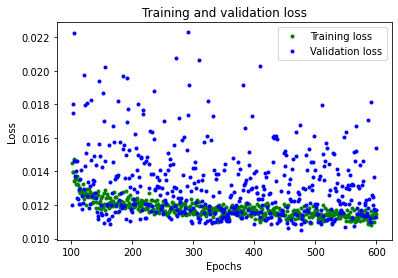

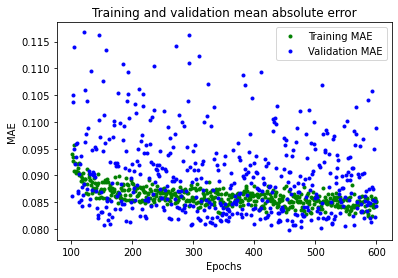

In [9]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
plt.clf()
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Comparando a inferência do modelo 2 com os valores reais

7/7 [==============================] - 0s 1ms/step - loss: 0.0156 - mae: 0.1021


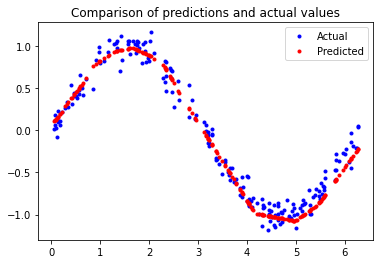

In [10]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

# Converter o modelo 2 do TensorFlor para o TFLite, sem e com quantization, usando flatbuffers

In [14]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("model_2.tflite",'wb').write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which includes quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
    yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()

# Save the model to disk
open("model_2_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\roger\AppData\Local\Temp\tmph8s1ngvf\assets


INFO:tensorflow:Assets written to: C:\Users\roger\AppData\Local\Temp\tmph8s1ngvf\assets


INFO:tensorflow:Assets written to: C:\Users\roger\AppData\Local\Temp\tmpgna9r8w7\assets


INFO:tensorflow:Assets written to: C:\Users\roger\AppData\Local\Temp\tmpgna9r8w7\assets
c:\Users\roger\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


2752

# Testando o modelo 2 convertido

[0.8899349]


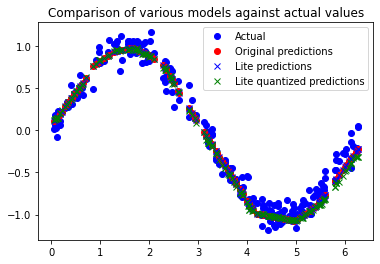

In [30]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('model_2.tflite')
sine_model_quantized = tf.lite.Interpreter('model_2_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of the input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]


# Create arrays to store the results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each model's interpreter for each value and store the results in arrays
for x_value in x_test:
  # Create a 2D tensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write the value to the input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read the prediction from the output tensor
  sine_model_predictions.append(
      sine_model.get_tensor(sine_model_output_index)[0])
  # Do the same for the quantized model
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(
      sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()

# Comparando o tamanho dos modelos no TF, TFL e TFL Quantized

In [15]:
import os
basic_model_size = os.path.getsize("model_2.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("model_2_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2932 bytes
Quantized model is 2752 bytes
Difference is 180 bytes


# Serializar o modelo em um C array

Abrir um terminal  git bash e executar:

``xxd -i ipynb/model_2_quantized.tflite > ipynb/model_2_quantized.cc``